In [1]:
##### Pyber Challenge. Module 5.

### Challenge Questions
## ? Is there a correlation between average fare and the total rides for city types?
## ? Is there any statistical significance between different city types for Fares
    
### Challenge Objectives:
##  Use Pandas DF functions: groupby(), pivot(), resample(), reset_index()
##  Use Pandas methods and attributes on a DataFrame or Series
##  Create a new DF from multiple groupby() Series
##  Format columns of a DataFrame.
##  Create a multiple-line graph.
##  Annotate and apply styling to the chart

### Code Outline

## Create a PyBer Summary Dataframe
# Prep environment and dependicies
# Get and read CSV data into DFs
# Inspect Data.  NULLS and proper Datatypes
# Merge into single DF
# Create DFs by City types - three categories
# Summarize Total Rides Per City Type
# Summarize Total Drivers Per City Type
# Summarize Total Fares Per City Type
# Calculate Average Fare per Ride
# Summarize Total Rides Per City Type
# Create Summmary DataFrame 

## Create a Pyber plot of Total Fare by City Type
# 1 Rename summary DF columns
# 2 Set Index to date
# 3 Create new DF incluing only Date, City Type and Fare uisng copy()
# 4 Set index to datetime data type.
# 5 Drop extra Date column -- nothing to drop. bad instruction. 
# 6 Check DF Info
# 7 Calculate Sum() of Fare by type of city using groupby() to create a series.
# 8 Convert the groupby() series into a DF
# 9 Reset index
#10 Create a pivot table DF. Date as index. Columns="City Type", Values = Fare
#11 Create a new DF from #10 using loc to limit range from  '2019-01-01':'2019-04-28'
#12 Create a new DF from 11 using resample in weekly bins and calculate sum() of fare for each week.
#13 Use Ax method to create the plot
    # use style fivethirtyeight
    # Add title, labels, etc. Size appropriately,
    # and and configure X and Y axes as per provided final figure

In [2]:
##Start with the magic inline command


%matplotlib inline

In [3]:
# Dependencies
import matplotlib as mpl  # calls the greater matplotlib library
import matplotlib.pyplot as plt  # matplotlib pyplot graphics library
import pandas as pd # the pandas
import numpy as np # NumPy
import scipy.stats as sts # SciPy
import matplotlib as mpl  # call the matplotlib library

In [4]:
# Load the files
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [5]:
# Load the city data into a Dataframe
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(5)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [6]:
# Load the ride data into a Dataframe
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.tail(5)

,city,date,fare,ride_id
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277
2374,Newtonview,2019-04-25 10:20:13,55.84,9990581345298


In [7]:
### Data Inspection
## Check rows and columns for null values
## Ensure correct data types; ie. driver_count
## List data points for each type of city

In [8]:
## City Check for Null Values
#City Data
#city_data_df.count() # returns 120 values in three fields
#city_data_df.isnull().sum() # sums null values per field.  
##No Nulls found in City Data.

In [9]:
## Ensure correct data type for driver_count so we can do calculations on field
#city_data_df.dtypes # driver count in int64. so we are good for calcs.
#ride_data_df.dtypes # ride data looks correct. Date treated as object\string

In [10]:
## List data points for each type of city
city_types = city_data_df["type"].unique() # uses unique() method on specific column
city_types=np.sort(city_types)  # numby sort
city_types

array(['Rural', 'Suburban', 'Urban'], dtype=object)

In [11]:
## City Types : count of types
#sum(city_data_df["type"]=="Urban")
#sum(city_data_df["type"]=="Suburban")
#sum(city_data_df["type"]=="Rural")
## 66 Urban 36 Suburban  leaving 18 for Rural - math baby

In [12]:
## Inspect Ride Data Dataframe
#ride_data_df.dtypes # inspect the datatypes 

## Check Ride Data for Nulls

#ride_data_df.count() # returns 2375 values in four fields
#ride_data_df.isnull().sum() # sums null values per field.  

## No Nulls found in Ride Data.

## Inspect fare and ride_id fields for numerical
# ride_data_df.dtypes
# ride data looks correct. fare is float 64 and ride_id is int. Will work!

In [13]:
### Merge the DataFrames
# new_df = pd.merge(leftdf, rightdf, on=["column_leftdf", "column_rightdf"])

# In our case we join on city. 
# It is a left join since we want all ride data plus matching city data

pyber_data_df=pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [14]:
### Create DataFrames for each city type.
##  Create Urban cities DF
urban_cities_df=pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [15]:
## Create subarban DFs
suburban_cities_df=pyber_data_df[pyber_data_df["type"]=="Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [16]:
## Create rural DFs
rural_cities_df=pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [17]:
### Total Rides: Rides Per City
## Urban Rides Per City
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
#urban_ride_count.head()
urban_ride_count = urban_ride_count.sum()
urban_ride_count

1625

In [18]:
## Suburban Rides Per City
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
#suburban_ride_count.head()
suburban_ride_count=suburban_ride_count.sum()
suburban_ride_count

625

In [19]:
## Rural Rides Per City
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
#rural_ride_count.head()
rural_ride_count=rural_ride_count.sum()
rural_ride_count

125

In [20]:
### Total Drivers: Actually calculated as Average Drivers Per City 
    # Conflict between instructions and proviced picture of what final summary DataFrame should look like.
    # The DataFrame pictures is asking for Avergage Drivers per City in the Total Drives field. 
## Urban Drivers Per City
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count=urban_driver_count.sum()
urban_driver_count

2405.0

In [21]:
## Suburban Drivers Per City
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_driver_count.sum()
suburban_driver_count

490.0

In [22]:
## Rural Drivers per City
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count=rural_driver_count.sum()
rural_driver_count

78.0

In [23]:
### Total Fares Per City

In [24]:
## Urban Tatal Fares
urban_tot_fare = urban_cities_df.groupby(["city"]).sum()["fare"]
urban_tot_fare=urban_tot_fare.sum()
urban_tot_fare

39854.38000000001

In [25]:
## Suburban Tatal Fares
suburban_tot_fare = suburban_cities_df.groupby(["city"]).sum()["fare"]
suburban_tot_fare=suburban_tot_fare.sum()
suburban_tot_fare

19356.33

In [26]:
## Rural Tatal Fares
rural_tot_fare = rural_cities_df.groupby(["city"]).sum()["fare"]
rural_tot_fare=rural_tot_fare.sum()
rural_tot_fare

4327.93

In [27]:
### Average Fare per Ride Calculation
## Urban Average Fare per Ride
urban_avg_fare_per_ride = urban_tot_fare / urban_ride_count #* 100
urban_avg_fare_per_ride

24.525772307692314

In [28]:
# Suburban Average Fare per Ride
suburban_avg_fare_per_ride = suburban_tot_fare / suburban_ride_count #* 100
suburban_avg_fare_per_ride

30.970128000000003

In [29]:
# Rural Average Fare per Ride
rural_avg_fare_per_ride = rural_tot_fare / rural_ride_count #* 100
rural_avg_fare_per_ride

34.62344

In [30]:
### Average Fare per Driver
## Urban Average Fare per Driver
urban_avg_fare_per_driver = urban_tot_fare/ urban_driver_count#* 100
urban_avg_fare_per_driver

16.57146777546778

In [31]:
## Suburban Average Fare per Driver
suburban_avg_fare_per_driver = suburban_tot_fare/ suburban_driver_count #* 100
suburban_avg_fare_per_driver

39.50271428571429

In [32]:
## rural Average Fare per Driver
rural_avg_fare_per_driver = rural_tot_fare/ rural_driver_count #* 100
rural_avg_fare_per_driver

55.48628205128205

In [33]:
## quick data review
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [34]:
# check the data types
pyber_data_df.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

In [35]:
### Create Summmary DataFrame 
### This first attempt to create  the dataframe does work
### but formatting becomes impossible because everything 
### gets treated as string.

### May Have to find another way to create the DF
###  The below actually worked for creating it, but cannot format it... Seems like there are better ways.

#  pyber_summary_data = [{"Type": "Rural", "Total Rides": rural_ride_count, "Total Drivers":rural_driver_count,"Total Fares": rural_tot_fare, "Average Fare per Ride":rural_avg_fare_per_ride,"Average Fare per Driver":rural_avg_fare_per_driver},
#       {"Type":"Suburban","Total Rides":suburban_ride_count, "Total Drivers":suburban_driver_count, "Total Fares":suburban_tot_fare, "Average Fare per Ride":suburban_avg_fare_per_ride,"Average Fare per Driver":suburban_avg_fare_per_driver},
#       {"Type":"Urban", "Total Rides":urban_ride_count, "Total Drivers":urban_driver_count, "Total Fares":urban_tot_fare, "Average Fare per Ride": urban_avg_fare_per_ride, "Average Fare per Driver":urban_avg_fare_per_driver}]
#  pyber_summary_df=pd.DataFrame(pyber_summary_data) 
#  pyber_summary_df

In [36]:
### Trying a different way to create the dataframe
 ##  Combine the five series into a single dataframe    

In [37]:
#### Method 2 of creating DF

In [38]:
## First series for DF  is Total Rides
# total_rides_by_type = pd.DataFrame({
#      "Rural": rural_ride_count,
#      "Suburban": suburban_ride_count,
#      "Urban": urban_ride_count})
# total_rides_by_type
## create a series not a DF
total_rides_by_type = (rural_ride_count, suburban_ride_count,urban_ride_count)
total_rides_by_type

(125, 625, 1625)

In [39]:
## Second series for DF is Total Drivers

# total_drivers_by_type = pd.DataFrame({
#      "Rural": rural_driver_count,
#      "Suburban": suburban_driver_count,
#      "Urban": urban_driver_count})
# total_drivers_by_type

## create a series not a DF
total_drivers_by_type =(rural_driver_count, suburban_driver_count, urban_driver_count)
total_drivers_by_type

(78.0, 490.0, 2405.0)

In [40]:
## Third series for DF is Total Fares
# total_fares = pd.DataFrame({
#      "Rural": rural_tot_fare,
#      "Suburban": suburban_tot_fare,
#      "Urban": urban_tot_fare})
# total_fares

## create a series not a DF
total_fares =(rural_tot_fare, suburban_tot_fare, urban_tot_fare)
total_fares

(4327.93, 19356.33, 39854.38000000001)

In [41]:
## Fourth series Average Fare Per Ride
# avg_fare_per_ride = pd.DataFrame({
#      "Rural": rural_avg_fare_per_ride,
#      "Suburban": suburban_avg_fare_per_ride,
#      "Urban": urban_avg_fare_per_ride},index=[0])
# avg_fare_per_ride

## create a series not a DF
avg_fare_per_ride = (rural_avg_fare_per_ride, suburban_avg_fare_per_ride, urban_avg_fare_per_ride)
avg_fare_per_ride

(34.62344, 30.970128000000003, 24.525772307692314)

In [42]:
## Fith series Average Fare Per Driver
# avg_fare_per_driver = pd.DataFrame({
#      "Rural": rural_avg_fare_per_driver,
#      "Suburban": suburban_avg_fare_per_driver,
#      "Urban": urban_avg_fare_per_driver},index=[4])
# avg_fare_per_driver

## create a series not a DF
avg_fare_per_driver = (rural_avg_fare_per_driver, suburban_avg_fare_per_driver, urban_avg_fare_per_driver)
avg_fare_per_driver

(55.48628205128205, 39.50271428571429, 16.57146777546778)

In [43]:
 ## Now the summary data frame?

pyber_summary_data_df=pd.DataFrame({
    "City Types" : city_types,
    "Total Rides" : total_rides_by_type,
    "Total Drivers":total_drivers_by_type,
    "Total Fares": total_fares,
    "Average Fare per Ride":avg_fare_per_ride,
    "Average Fare per Driver": avg_fare_per_driver})
 pyber_summary_data_df

,City Types,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
0,Rural,125,78.0,4327.93,34.623440,55.486282
1,Suburban,625,490.0,19356.33,30.970128,39.502714
2,Urban,1625,2405.0,39854.38,24.525772,16.571468


In [44]:
## Change the index to City Types
pyber_summary_data_df.set_index("City Types", inplace = True)
pyber_summary_data_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
City Types,,,,,
Rural,125,78.0,4327.93,34.623440,55.486282
Suburban,625,490.0,19356.33,30.970128,39.502714
Urban,1625,2405.0,39854.38,24.525772,16.571468


In [45]:
## now the formatting

#total_drivers_by_type= total_drivers_by_type.map("{:.0f}".format)
pyber_summary_data_df["Total Drivers"]= pyber_summary_data_df["Total Drivers"].map("{:.0f}".format)
pyber_summary_data_df["Total Fares"]= pyber_summary_data_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_data_df["Average Fare per Ride"]= pyber_summary_data_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_data_df["Average Fare per Driver"]= pyber_summary_data_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_data_df.index.name = None
pyber_summary_data_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


In [46]:
#### Ok.  We have completed Part 1. Wow that was a doozy,.

In [47]:
#### Now Part II Create a Muliple-Line Plot for the
###   Sum of the Fares for Each City Type 
## 1 Rename columns
## 2 Set index to Date
## 3 Create new DF for fares, include DAte, City Type, Fare
 #   Use the copy() method
## 4 Drop extra Date column
## 5 Set index to the datetime data type
## 6 Check the DataFrame using the info() method to make sure the index is a datetime data type.
## 7 Calculate the sum() of fares by the type of city and date using groupby() to create a Series.
## 8 Convert the groupby() Series into a DataFrame.
## 9 Reset the index, which is needed for Step 10.
## 10 Create a pivot table DataFrame with the Date as the index and columns = 'City Type' with the Fare for each Date in each row. Note: There will be NaNs in some rows, which will be taken care of when you sum based on the date.
## 11 Create a new DataFrame from the pivot table DataFrame on the given dates '2019-01-01':'2019-04-28' using loc .
## 12 Create a new DataFrame by setting the DataFrame you created in Step 11 with resample() in weekly bins, and calculate the sum() of the fares for each week.
## 13 Using the object-oriented interface method, plot the DataFrame you created in Step 12 using the df.plot() function. Things to consider with your plotting:
##    Import the style from Matplotlib.
##    Use the graph style fivethirtyeight.
##    Add a title.
##    Add x- and y-axes labels according to the final figure.
##    Save the figure to the “analysis” folder.
##    Make the figure size large enough so it’s not too small.

In [48]:
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [49]:
## 1 Rename columns  
pyber_data_df.rename(columns={'city': 'City',
                     'date':'Date',
                     'fare':'Fare', 
                     'ride_id': 'Ride Id',
                     'driver_count': 'No. Drivers', 
                     'type':'City Type'}, inplace=True)
pyber_data_df.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [50]:
## 2 Set index to Date
pyber_data_df.set_index("Date", inplace = True)
pyber_data_df.head()

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban


In [51]:
## 3 Create new DF for fare data, include Date, City Type, Fare
pyber_data_fares_df = pyber_data_df[["Fare", "City Type"]].copy() ## very nice way to work with subset of data w\o changing original data
pyber_data_fares_df

,Fare,City Type
Date,,
2019-01-14 10:14:22,13.83,Urban
2019-03-04 18:24:09,30.24,Urban
2019-02-24 04:29:00,33.44,Urban
2019-02-10 23:22:03,23.44,Urban
2019-03-06 04:28:35,34.58,Urban
...,...,...
2019-04-29 17:04:39,13.38,Rural
2019-01-30 00:05:47,20.76,Rural
2019-02-10 21:03:50,11.11,Rural


In [52]:
## 3b Drop unnecessary columns
## pyber_data_fares_df.drop(columns=[("Ride Id"),("No. Drivers"),("City")], inplace=True)

In [53]:
## 4 Drop extra Date column  ??? there is no extra date column
#pyber_data_fares_df.head()

In [54]:
## 5 set the index to date time data type. 
pyber_data_fares_df.index = pd.to_datetime(pyber_data_fares_df.index)

In [55]:
## 6 Validate date time fo the index
pyber_data_fares_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
Fare         2375 non-null float64
City Type    2375 non-null object
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [56]:
#preview data
pyber_data_fares_df.head()

,Fare,City Type
Date,,
2019-01-14 10:14:22,13.83,Urban
2019-03-04 18:24:09,30.24,Urban
2019-02-24 04:29:00,33.44,Urban
2019-02-10 23:22:03,23.44,Urban
2019-03-06 04:28:35,34.58,Urban


In [57]:
## 7 Calculate the sum() of fares by the type of city using groupby() to create a Series.
sum_fares_by_type = pyber_data_fares_df.groupby(["City Type"]).sum()["Fare"]
sum_fares_by_type

City Type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: Fare, dtype: float64

In [58]:
## 7b Calculate the sum() of fares by date using groupby() to create a Series.
sum_fares_by_date = pyber_data_fares_df.groupby(["Date"]).sum()["Fare"]
sum_fares_by_date.head()

Date
2019-01-01 00:08:16    37.91
2019-01-01 00:46:46    47.74
2019-01-01 02:07:24    24.07
2019-01-01 03:46:50     7.57
2019-01-01 05:23:21    10.75
Name: Fare, dtype: float64

In [59]:
## 8 Convert the series into a dataframes.  ## not sure I need to do this but..
sum_fares_by_type_df=pd.DataFrame({"Sum_of_Fares_by_Type" : sum_fares_by_type})
sum_fares_by_date_df=pd.DataFrame({"Sum_of_Fares_by_Date" : sum_fares_by_date})

In [60]:
## review dfs
#sum_fares_by_type_df
sum_fares_by_date_df.head()

,Sum_of_Fares_by_Date
Date,
2019-01-01 00:08:16,37.91
2019-01-01 00:46:46,47.74
2019-01-01 02:07:24,24.07
2019-01-01 03:46:50,7.57
2019-01-01 05:23:21,10.75


In [61]:
## 9 Reset the index, which is needed for Step 10.
#sum_fares_by_type_df = sum_fares_by_type_df.reset_index()
#sum_fares_by_date_df = sum_fares_by_date_df.reset_index()
pyber_data_fares_df = pyber_data_fares_df.reset_index()

In [62]:
## review dfs
#sum_fares_by_type_df
sum_fares_by_date_df.head()
#pyber_data_fares_df.info()

,Sum_of_Fares_by_Date
Date,
2019-01-01 00:08:16,37.91
2019-01-01 00:46:46,47.74
2019-01-01 02:07:24,24.07
2019-01-01 03:46:50,7.57
2019-01-01 05:23:21,10.75


In [63]:
## 10 Create pivot table Datafrme. 
pd.pivot_table(pyber_data_fares_df, 
                   values="Fare", 
                   index="Date",
                   columns="City Type")
## that took a lot more work that it looks like... 
## a lot of work to get this far. damn cold. 
#                      pd.pivot_table(df1, values='lifeExp', 
#                      index=['year'], 
#                      columns='City Type')

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [64]:
## 11 Create a Dataframe from pivot data frame. 

pyber_data_fares_df_sub= pd.pivot_table(pyber_data_fares_df, 
                    values="Fare", 
                    index="Date",
                    columns="City Type")
pyber_data_fares_df_sub.head()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [65]:
# review data
#pyber_data_fares_df_sub.head()
pyber_data_fares_df_sub = pyber_data_fares_df_sub.reset_index()
pyber_data_fares_df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
Date        2375 non-null datetime64[ns]
Rural       125 non-null float64
Suburban    625 non-null float64
Urban       1625 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 74.3 KB


In [66]:
### 11 B. Filter the DF  by Date Range

## start with a mask for date range
#mask     = (df                     ['date'] > start_date)   & (df                     ['date'] <= end_date)
datemask = (pyber_data_fares_df_sub['Date'] > "2018-12-01") & (pyber_data_fares_df_sub['Date'] <="2019-04-29")

## Now use panda to create a new datafra,e filtered on dates
pyber_sandbox_df=pd.DataFrame(pyber_data_fares_df_sub.loc[datemask])

# and now review
pyber_sandbox_df.head()

City Type,Date,Rural,Suburban,Urban
0,2019-01-01 00:08:16,NaN,NaN,37.91
1,2019-01-01 00:46:46,NaN,47.74,NaN
2,2019-01-01 02:07:24,NaN,24.07,NaN
3,2019-01-01 03:46:50,NaN,NaN,7.57
4,2019-01-01 05:23:21,NaN,NaN,10.75


In [67]:
## 11. Reset index and review
pyber_sandbox_df.set_index("Date", inplace = True)
#pyber_sandbox_df.info()
pyber_sandbox_df.head()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [68]:
## so far so good. chill for a bit here. 4pm Friday
## Cont  Sat 9:15 am

In [69]:
### 12 Create a new DataFrame by 
##  setting the DataFrame you created in Step 11 
##  with resample() in weekly bins,
##  and calculate the sum() of the fares for each week.
pyber_fare_fin_df =pyber_sandbox_df.resample('W').sum()

pyber_fare_fin_df.head()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


In [70]:
## DF review structure
pyber_fare_fin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17 entries, 2019-01-06 to 2019-04-28
Freq: W-SUN
Data columns (total 3 columns):
Rural       17 non-null float64
Suburban    17 non-null float64
Urban       17 non-null float64
dtypes: float64(3)
memory usage: 544.0 bytes


In [71]:
### 13 Create the plot. Use object oriented method
    # import style from Matplotlib - graph style fivethirtyeight
    # Add a tile
    # Add x and y axes labels 
    # Save figure to the "analysis" folder.
    # Give figure a good size

In [72]:
## 13 efforts
#pyber_fare_fin_df = pyber_fare_fin_df.reset_index()
#pyber_fare_fin_df|

In [73]:
##  13a Define   X axis
x_axis = pyber_fare_fin_df.index
print(x_axis)

DatetimeIndex(['2019-01-06', '2019-01-13', '2019-01-20', '2019-01-27',
               '2019-02-03', '2019-02-10', '2019-02-17', '2019-02-24',
               '2019-03-03', '2019-03-10', '2019-03-17', '2019-03-24',
               '2019-03-31', '2019-04-07', '2019-04-14', '2019-04-21',
               '2019-04-28'],
              dtype='datetime64[ns]', name='Date', freq='W-SUN')


In [74]:
## 13b Define Y axis for Urban
urban_y_axis = pyber_fare_fin_df["Urban"]
urban_y_axis.head()

Date
2019-01-06    1661.68
2019-01-13    2050.43
2019-01-20    1939.02
2019-01-27    2129.51
2019-02-03    2086.94
Freq: W-SUN, Name: Urban, dtype: float64

In [75]:
## 13c Define Y axis for Suburban
suburban_y_axis = pyber_fare_fin_df["Suburban"]
suburban_y_axis.head()

Date
2019-01-06     721.60
2019-01-13    1105.13
2019-01-20    1218.20
2019-01-27    1203.28
2019-02-03    1042.79
Freq: W-SUN, Name: Suburban, dtype: float64

In [76]:
## 13c Define Y axis for Rural
rural_y_axis = pyber_fare_fin_df["Rural"]
rural_y_axis.head()

Date
2019-01-06    187.92
2019-01-13     67.65
2019-01-20    306.00
2019-01-27    179.69
2019-02-03    333.08
Freq: W-SUN, Name: Rural, dtype: float64

C:\Users\Marishka\Anaconda3\envs\PythonData\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

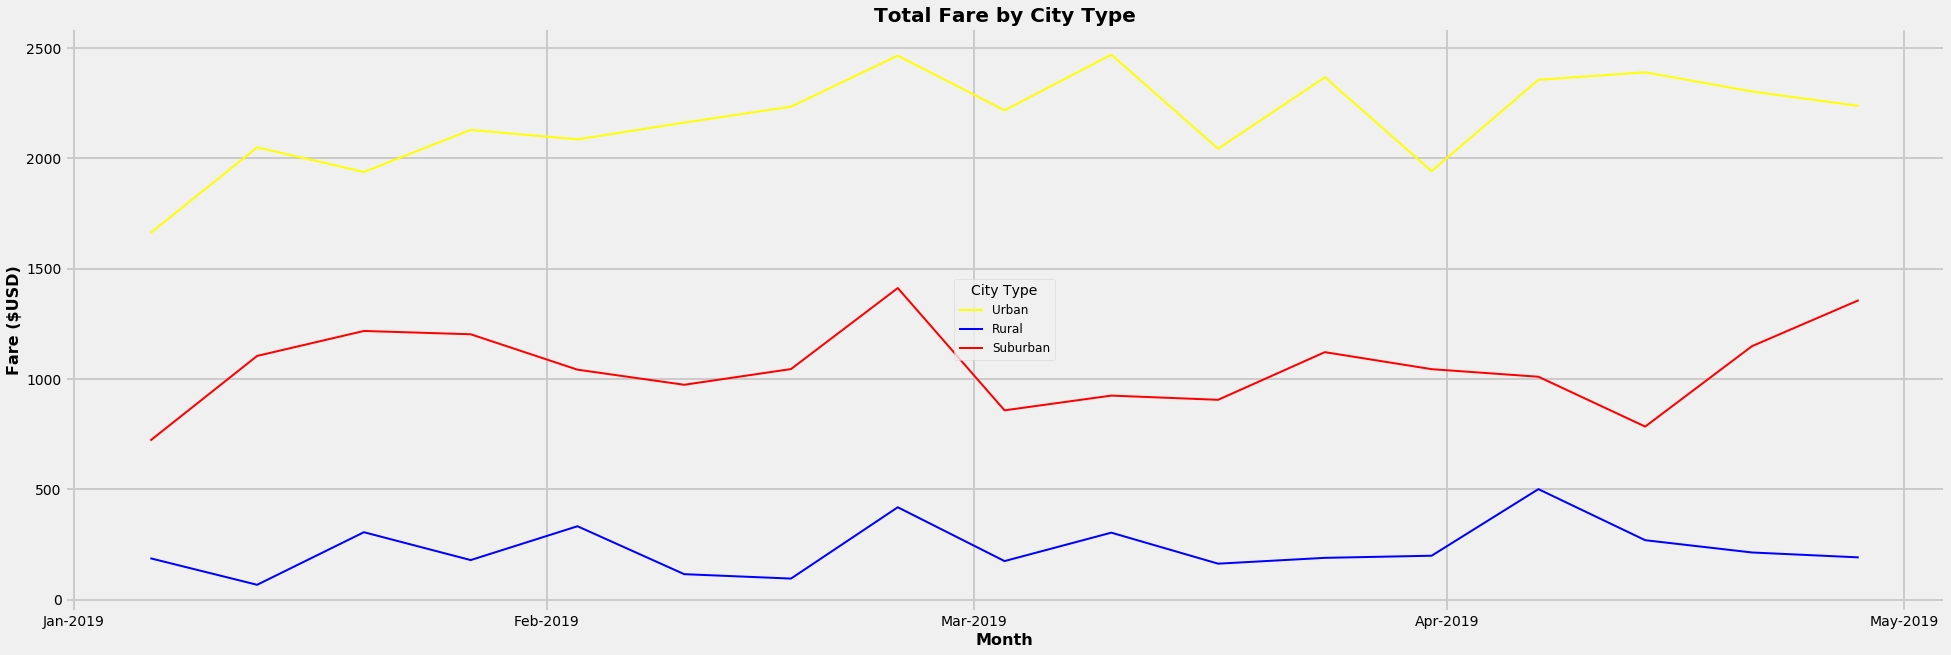

In [77]:
### 13 Now Create the plot  #

plt.style.use('fivethirtyeight') # figure style per requirement

fig, ax = plt.subplots(figsize=(30, 10))  ## calls object_oriented method and sets  nice diagonal size

## Build the plot
ax.plot(x_axis, urban_y_axis, color="yellow", linewidth=2, label="Urban")  # plots urban fares
ax.plot(x_axis, rural_y_axis, color="blue", linewidth=2, label="Rural")  # plots rural fare
ax.plot(x_axis, suburban_y_axis, color="red", linewidth=2, label="Suburban") # plots suburban fares

# #Set a title
ax.set_title("Total Fare by City Type", fontsize=20, weight="bold")

# # Label the axes
ax.set_xlabel("Month", fontsize=16, weight='bold')
ax.set_ylabel("Fare ($USD)", fontsize=16, weight='bold')

## set x axis ticks to months 
import matplotlib.dates as mdates  ## get the needed library for handling dates
months = mdates.MonthLocator()  ## use to find months
ax.xaxis.set_major_locator(months) # use ax set_major_locator(). Sets ticks to month 

## format x axis to month plus year format as per pix. could not figure out how to now show for in between ticks.
month_format = mdates.DateFormatter("%b-%Y")  ## sets format to month- year
ax.xaxis.set_major_formatter(month_format)

## Legend parameters
# sets lgnd as variable for plt.legend() with these parameters.
lgnd = plt.legend(fontsize="12"
             , scatterpoints=1 # number of markers in the legend. nice fine continous line.
             , loc="center"  # place legend in center
             , title="City Type") # legend title
lgnd.legendHandles[0]._sizes = [100] # sets legend handles to 100
lgnd.legendHandles[1]._sizes = [100] # and so on for 2nd item.
lgnd.legendHandles[2]._sizes = [100] # and so on.
lgnd.get_title().set_fontsize(14) # legend title size
lgnd.get_title().set_weight="bold" # bold the legend title

# Setting grid, with a visible linewidth
ax.grid(linewidth=2) 

##  save the figure to drive.
plt.savefig("analysis\Total_Fare_by_City_Type_Pyber_Challenge_Module_5.png")

### show me the dream!!!
plt.show

In [78]:
## save and commit!! 